# Tutorial sulle le API di Reddit

**Nome**: Salvatore Alfio<br>
**Cognome**: Sambataro<br>
**Matricola**: 1000015834<br>
**Corso**: Social Media Management<br>
**Docente**: Antonino Furnari<br>
**Anno accademico**: 2022/2023<br>

# Introduzione

Reddit è un social network in cui gli utenti possono creare e condividere contenuti. 
Il sito è diviso in comunità chiamate **subreddit**, ognuna delle quali riguarda argomenti diversi, e qualsiasi utente può creare un subreddit o far parte dei subreddit già esistenti.

### Come funziona Reddit

Gli utenti possono pubblicare all'interno dei subreddit post contenenti immagini o testo, e possono anche commentare i post di altri utenti. Ogni volta che qualcuno pubblica contenuti o commenta un post, guadagna dei punti chiamati "karma". Inoltre, è presente anche un sistema di **upvotes** e **downvotes**: i voti vengono dati in maniera anonima e permettono di "declassare" contenuti e commenti considerati poco interessanti.

### Perchè Reddit può essere interessante per la raccolta di dati

Dal punto di vista dell'analisi di dati, Reddit offre molteplici possibilità, in quanto ci sono subreddit e discussioni praticamente riguardo ogni possibile argomento. In particolare, si può pensare di analizzare i titoli delle discussioni, i commenti degli utenti, il "livello di attività" degli utenti, e così via. 

---

# API DI Reddit
Un modo per ottenere dati da Reddit è utilizzare le API REST ufficiali fornite da Reddit stesso, di cui è presente una [documentazione autogenerata](https://www.reddit.com/dev/api) in cui sono spiegate tutte le funzionalità delle API ufficiali. Per avere maggiori dettagli sul funzionamento delle API, è possibile anche visitare la [wiki ufficiale](https://github.com/reddit-archive/reddit/wiki/API).

### Utilizzo delle API
#### Creazione di un profilo utente
Per utilizzare le API è necessario creare un profilo personale: è sufficiente collegarsi al [sito ufficiale di Reddit](https://www.reddit.com/) e cliccare su "**Iscriviti**".

<br><br>

![pulsante iscrizione](Immagini/pulsanteIscriviti.png)

<br><br>

#### E' possibile registrarsi con il proprio account Google, account Apple oppure con il proprio indirizzo email

![metodi di accesso](Immagini/metodiAccesso.png)

<br><br>

#### Scegliere un nome utente e una password, e cliccare sul pulsante "Iscriviti"

![scelta nome utente](Immagini/sceltaUtente.png)

<br><br>

#### A questo punto, saremo reindirizzati alla Home Page del sito, dove verranno chiesti quali sono gli interessi dell'utente, al fine di personalizzare il feed nella home page di quest'ultimo


![scelta nome utente](Immagini/inizioProfilo.png)


<br><br>


#### Creazione di un'applicazione
Al fine di utilizzare le API di Reddit, è necessario creare un'applicazione dal nostro profilo personale. Per farlo, basta raggiungere [questo link](https://www.reddit.com/prefs/apps) dopo aver effettuato l'accesso.
A questo punto, scorrere in basso e clicclare su "**Sei uno sviluppatore? Crea un'applicazione**"
<br><br>
![crea APP](Immagini/creaApp.png)


Inseriamo adesso tutti i dati riguardanti la nostra applicazione:

**Nome**: nome della nostra applicazione<br>
**Tipo applicazione**: nel nostro caso sarà un semplice **script personale**<br>
**Descrizione**: descrizione di cosa fa l'applicazione<br>
**URL per le info**: url di reindirizzamento verso un sito web del proprietario dell'app. Usato solitamente per applicazioni distribuite a diversi utenti. Nel nostro caso lasceremo il campo vuoto. <br>
**URI di reindirizzamento**: Nel nostro caso, sarà semplicemente un indirizzo localhost del tipo ***http://localhost:8080***<br><br>

Una volta inseriti tutti i dati, cliccare sul tasto "**create App**"

![inserimento dati e creazione applicazione](Immagini/datiApp.png)

<br><br>

Se tutto è andato a buon fine, l'applicazione appena creata risulterà nell'elenco delle app associate al nostro profilo, e ad essa saranno stati associati **due token**, fondamentali per l'uso dell'applicazione:
- un **personal use script token**
- un **secret token**

![token applicazione](Immagini/descrizioneApp.png)

<br>

A questo punto, *siamo pronti per usare le API di Reddit*
<br>

---

<br>

### Realizzazione dell'esempio pratico per il tutorial
Per realizzare un esempio di utilizzo reale delle API di Reddit per questo tutorial, verrà usato Python 3.9 e alcune librerie per effettuare richieste HTTP, leggere JSON, collezionare e analizzare dati provenienti da Reddit.

Tra le librerie utilizzate abbiamo:
- **requests**: libreria standard per effettuare HTTP in Python;
- **pandas** e **numpy**: raccolta e analisi di dati in strutture dati apposite;
- **pyplot / matplotlib**: realizzazione di grafici;
- **sys**: fornisce diverse funzioni e variabili usate per manipolare l'ambiente RunTime di Python. Nel nostro caso, sarà usata per uscire dal nostro script in caso di errori durante la sua esecuzione.
- **webbrowser**: permette di aprire link direttamente all'interno del browser
<br>

---

### Accesso alle API: autenticazione OAuth
Per avere la possibilità di usare le API di Reddit all'interno della nostra app, abbiamo bisogno di autenticarci attraverso il protocollo ***OAuth***: per farlo, visto che si tratta di uno script personale, possiamo richiedere un "***Access Token***"  attraverso una richiesta HTTP POST all' URL " https://www.reddit.com/api/v1/access_token " <u>**usando le credenziali dell'account che ha creato l'applicazione** (per questo motivo, questo metodo è utilizzabile solo dal creatore dell'applicazione. Nel nostro caso, essendo uno script per usi personali, questo metodo di autenticazione va bene)</u>.

Per effettuare tale richiesta abbiamo bisogno di:
1. **Token di autenticazione**: "personal use script token" e "secret token"
2. **Dati di autenticazione**: Username e Password **<u>del creatore dell'applicazione</u>** 
3. **Headers HTTP**: in questo caso ci sarà un solo campo "User Agent", che contiene il nome della nostra applicazione


### Utilizzo di un file Python per memorizzare le credenziali di accesso

Per evitare di inserire direttamente all'interno del codice le credenziali necessarie per l'utilizzo delle API, faremo uso di un **file di configurazione "accessData.py"** con il seguente formato:
<br>
<br>
![file credenziali](Immagini/credFile.png)

<br>

Quello che facciamo è quindi **importare il file e fare uso delle credenziali in esso contenute**, e definiamo poi i dati che ci servono per effettuare l'autenticazione.

In [1]:
import requests
import accessData

USER = accessData.username
PASS = accessData.password
CLIENT_ID = accessData.clientID
CLIENT_SECRET = accessData.clientSecret

#Richiesta HTTP per effettuare l'autenticazione attraverso i due token. Formato: ('personal use script token','secret token')

auth = requests.auth.HTTPBasicAuth(CLIENT_ID , CLIENT_SECRET)

#Dizionario che contiene i dati di autenticazione. Il campo "grant-type" indica che vogliamo autenticarci tramite password

data = {'grant_type': 'password','username': USER,'password': PASS}

#Impostazione dell'Header con il nome della nostra applicazione

headers = {'User-Agent': 'TutorialSocialMedia'}

A questo punto possiamo effettuare una richiesta HTTP POST per ottenere il nostro "Authorization Token", attravero funzioni messe a disposizione dalla libreria **request**:

In [2]:
res = requests.post('https://www.reddit.com/api/v1/access_token', auth=auth, data=data, headers=headers)

La risposta contenuta nella variabile **"res"** sarà un JSON. Controlliamo prima se c'è un errore nella richiesta, e in caso affermativo, interrompiamo l'esecuzione dello script mostrando qual è il problema, altrimenti stampiamo la risposta ottenuta.

In [3]:
import sys

if("error" in res.json()):
    print("Qualcosa è andato storto. Errore ",res.json()['error'],": ",res.json()['message'])
    sys.exit(1)

res.json()

{'access_token': '870647681277-CJkxkiczFQcMuKktMIwor67O1x_8-A',
 'token_type': 'bearer',
 'expires_in': 86400,
 'scope': '*'}

Come vediamo, se la richiesta va a buon fine, nella risposta JSON abbiamo:

- il **token** di cui avevamo bisogno per utilizzare le API
- il **tipo di token** (nel nostro caso "bearer". Per maggiori info: https://oauth.net/2/bearer-tokens/)
- la **durata del token**
- lo **scope**, cioè i permessi in uso dall'app (se '\*', abbiamo tutti i permessi)

Un ultimo passaggio prima di utilizzare le API è **aggiungere all'header il token appena ottenuto**:

In [4]:
token = res.json()['access_token']
headers = {**headers, **{'Authorization': f"bearer {token}"}}
_ = requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<br>

### Metodo alternativo per effettuare l'accesso

Nel caso in cui non si vogliano usare direttamente le proprie credenziali, possiamo ottenere l'accesso attraverso un **Authorization Token**. Una volta ottenuto, quest'ultimo potrà a sua volta essere "scambiato" con un "**Access Token**" con le stesse funzionalità viste nel precedente metodo di autenticazione.

<u>Questo metodo di autenticazione è ottimale nel caso in cui **la nostra applicazione venga distribuita a diversi utenti.**</u>

Per richiedere un **Authorization Token**, dobbiamo *aprire nel browser una finestra* all' URL
"https://www.reddit.com/api/v1/authorize?client_id=CLIENT_ID&response_type=TYPE&state=RANDOM_STRING&redirect_uri=URI&duration=DURATION&scope=SCOPE_STRING", dove:
- **CLIENT_ID**: client ID dell'applicazione
- **TYPE**: stringa "code"
- **RANDOM STRING**: stringa randomica
- **URI**: uri scelto al momento della registrazione dell'app
- **DURATION**: stringa "permanent" o "temporary"
- **SCOPE_STRING**: stringa contenente gli scope richiesti dall'applicazione
Per maggiori informazioni sui parametri, visitare [questo link](https://github.com/reddit-archive/reddit/wiki/OAuth2).

Per aprire la finestra nel browser, usiamo la libreria ***webbrowser***:

In [5]:
import webbrowser as wb

##Generiamo la stringa randomica

import secrets
import string
import random
 
N = random.randint(10, 15) #lunghezza stringa, anch'essa randomica
 
stringa = ''.join(secrets.choice(string.ascii_uppercase + string.digits) for i in range(N))
 
stringa=str(stringa)
print("Stringa randomica di verifica: "+stringa)

_ = wb.open("https://www.reddit.com/api/v1/authorize?client_id=4faLZblR-nzfGdztDqCblQ&response_type=code&state="+stringa+"&redirect_uri=http://localhost:8080&duration=temporary&scope=*")

Stringa randomica di verifica: E30WREI9QQHHD2


#### A questo punto, si aprirà una pagina del browser che chiederà all'utente di autorizzare l'accesso dell'applicazione ai dati richiesti
<br>
<br>

![accettaPermessi](Immagini/permessi.png)

<br>

Se l'accesso sarà autorizzato dall'utente, si aprirà automaticamente una nuova pagina all'interno del browser, nel cui URL saranno presenti 2 parametri:
- ***state***: se tutto ha funzionato correttamente, dovrebbe essere la stessa stringa randomica generata al passo precedente
- ***code***: Authorization token di cui avevamo bisogno (**esclusi eventuali caratteri "#_" alla fine del codice**)
<br><br>

![parametri URL](Immagini/paramURL.png)

<br><br>

Adesso, l'utente dovrà dare in input all'applicazione tale codice semplicemente copiandolo dall'URL del browser, e ***rimuovendo eventuali caratteri "#_" dalla fine del codice***, in modo che quest'ultimo possa essere scambiato con un vero e proprio *Access Token*.

In [6]:
authToken = str(input("Inserisci l'Authorization Token che trovi nell'URL della pagina che si è aperta automaticamente: "))

Inserisci l'Authorization Token che trovi nell'URL della pagina che si è aperta automaticamente: aBCtIRnJwVvmzR1ffLc_uKo807ilDg


Adesso basta fare una richiesta HTTP POST al link "https://www.reddit.com/api/v1/access_token" **inserendo tra i parametri un'apposita struttura dati** in cui specifichiamo come metodo di autenticazione "*authorization_token*":

In [7]:
auth = requests.auth.HTTPBasicAuth('4faLZblR-nzfGdztDqCblQ', 'JlX3vdT9fYKuaooNB8JbJkqcipzFhA')
headers = {'User-Agent':'TutorialSocialMedia'}
data = {'grant_type':'authorization_code','code':authToken,'redirect_uri':'http://localhost:8080'}
res = requests.post(url="https://www.reddit.com/api/v1/access_token", auth=auth, data=data,headers=headers)

print(res.json())

if("error" in res.json()):
    print("Qualcosa è andato storto. Errore ",res.json()['error'],": ",res.json()['message'])
    sys.exit(1)

{'access_token': '2361458410931-KsMJ1_ygoeVDWwdEfwzQDQd9Y1foIg', 'token_type': 'bearer', 'expires_in': 86400, 'scope': '*'}


Come nel caso del metodo di autenticazione precedente, una volta ottenuto il nostro Access Token, dovremo inserirlo tra gli header HTTP:

In [8]:
token = res.json()['access_token']

headers = {**headers, **{'Authorization': f"bearer {token}"}}
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

<br>

### **N.B. Per gli esempi successivi utilizzeremo l'access token ottenuto con quest'ultimo metodo di autenticazione**

<br>

---

### Oggetti tipici restituiti dalle chiamate alle API

Le chiamate alle API di Reddit, nella maggior parte dei casi, forniscono degli oggetti di ***classi specifiche***. Le più importanti sono:
- Comment: rappresenta un "commento"
- Link: rappresenta un "post"
- Subreddit: rappresenta un "subreddit"
- Messagge: rappresenta un "messaggio privato"
- Account: rappresenta un "account" di un utente

Ognuno degli oggetti restituiti presenta dei campi appositi, consultabili in [questa pagina](https://github.com/reddit-archive/reddit/wiki/JSON) della wiki ufficiale.

## Esempi di chiamate alle API ([documentazione completa](https://www.reddit.com/dev/api) delle possibili chiamate)

Per effettuare le chiamate alle API di Reddit, useremo anche in questo caso la libreria "*request*".
Tutte le richieste vanno inviate all'indirizzo ***https://oauth.reddit.com***

### Ottenere informazioni sull'utente attuale
Attravero la chiamata ***/api/v1/me*** possiamo restituire informazioni relative all'utente con cui abbiamo autorizzato l'accesso:

In [9]:
res = requests.get("https://oauth.reddit.com/api/v1/me",headers=headers)
res.json()

{'is_employee': False,
 'seen_layout_switch': False,
 'has_visited_new_profile': False,
 'pref_no_profanity': True,
 'has_external_account': False,
 'pref_geopopular': '',
 'seen_redesign_modal': False,
 'pref_show_trending': True,
 'subreddit': {'default_set': True,
  'user_is_contributor': False,
  'banner_img': '',
  'restrict_posting': True,
  'user_is_banned': False,
  'free_form_reports': True,
  'community_icon': None,
  'show_media': True,
  'icon_color': '',
  'user_is_muted': None,
  'display_name': 'u_TutorialSM223',
  'header_img': None,
  'title': '',
  'coins': 0,
  'previous_names': [],
  'over_18': False,
  'icon_size': [256, 256],
  'primary_color': '',
  'icon_img': 'https://styles.redditmedia.com/t5_7cn2uy/styles/profileIcon_snoo59a8c73f-264d-426d-b6b8-f05809cfe541-headshot.png?width=256&amp;height=256&amp;crop=256:256,smart&amp;s=cb93bfe5f43f558606adff94ee5e86cb6dcf8ee4',
  'description': '',
  'allowed_media_in_comments': [],
  'submit_link_label': '',
  'header_si

Possiamo anche "filtrare" il risultato e stampare solo i dati che ci interessano (in questo caso, a titolo di esempio, l'**Username** e il "**livello di Karma**" dell'utente, il che non è altro che un "sistema di reputazione" per gli utenti di Reddit)

In [10]:
print("Nome Utente: ",res.json()['name'])
print("Karma: ",res.json()['link_karma'])

Nome Utente:  TutorialSM223
Karma:  1


---

### Ottenere gli attuali "Hot Post" di un certo subreddit
Attravero la chiamata **/r/*subreddit*/?*parametri*** possiamo ottenere informazioni relative ai migliori post (per tutti i parametri vedere [questa pagina della wiki](https://www.reddit.com/dev/api#GET_hot)).

<br>

Per vedere quali sono i dati contenuti nella risposta in formato JSON, limitiamoci a estrarre il **primo post "hot"** del subreddit "Today I Learned", un subreddit in cui gli utenti, come suggerisce il nome stesso, scrivono post riguardanti "qualcosa che hanno imparato oggi":

In [11]:
res = requests.get("https://oauth.reddit.com/r/todayilearned/hot/?limit=1",headers=headers)
res.json()

{'kind': 'Listing',
 'data': {'after': 't3_z0x1zy',
  'dist': 1,
  'modhash': None,
  'geo_filter': None,
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'todayilearned',
     'selftext': '',
     'author_fullname': 't2_rcr7w',
     'saved': False,
     'mod_reason_title': None,
     'gilded': 0,
     'clicked': False,
     'title': 'TIL in Germany, children are divided, after 10, between several options for secondary school, according to their school results',
     'link_flair_richtext': [],
     'subreddit_name_prefixed': 'r/todayilearned',
     'hidden': False,
     'pwls': 6,
     'link_flair_css_class': None,
     'downs': 0,
     'thumbnail_height': 140,
     'top_awarded_type': None,
     'hide_score': False,
     'name': 't3_z0x1zy',
     'quarantine': False,
     'link_flair_text_color': 'dark',
     'upvote_ratio': 0.94,
     'author_flair_background_color': None,
     'subreddit_type': 'public',
     'ups': 10923,
     'total_awards_rece

La risposta è formata essenzialmene da due "parti": 
- '**kind**': il tipo di oggetto restituito
- '**data**': i dati effettivi
In questo caso, ad esempio, l'oggetto restituito è un "Listing", cioè un "insieme di post" (anche se in questo caso abbiamo un solo post).
I dati effettivi sono contenuti all'interno del campo "**data**", al cui interno è contenuto un altro campo "**children**", il quale contiene le informazioni relative ai singoli post all'interno di un ulteriore campo, chiamato anche in questo caso "**data**".

Facciamo un'altra chiamata, e questa volta otteniamo i primi 10 post "hot" del subreddit "Today I Learned", stampando però per ognuno solo **titolo**, **numero di commenti** e **numero di "upvotes"**.

In [12]:
res = requests.get("https://oauth.reddit.com/r/todayilearned/hot/?limit=10",headers=headers)
for i in range(10):
    print("Titolo: ",res.json()['data']['children'][i]['data']['title'])
    print("Commenti:", res.json()['data']['children'][i]['data']['num_comments'])
    print("Upvotes:", res.json()['data']['children'][i]['data']['ups'])
    print("\n")

Titolo:  TIL in Germany, children are divided, after 10, between several options for secondary school, according to their school results
Commenti: 1470
Upvotes: 10928


Titolo:  TIL the Wright Brothers were perpetual bachelors, and that Orville Wright disowned their sister Katherine after she married and had a family of her own, feeling he had been "betrayed".
Commenti: 359
Upvotes: 9899


Titolo:  TIL that photographer Carol Highsmith donated tens of thousands of her photos to the Library of Congress, making them free for public use. Getty Images later claimed copyright on many of these photos, then accused her of copyright infringement by using one of her own photos on her own site.
Commenti: 1676
Upvotes: 73495


Titolo:  TIL in 2011, The Walt Disney company attempted to trademark the name "SEAL Team 6" days after the raid on Osama bin Laden
Commenti: 126
Upvotes: 2103


Titolo:  TIL In 2005, the Guinness Book of World Records recognized the Confucius genealogical line as the longes

### Uso dei DataFrame della libreria Pandas ([documentazione](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html))
Per una migliore consultazione, possiamo raccogliere i dati ottenuti attraverso queste chiamate in un **Data Frame** grazie alla libreria *Pandas*.

In questo caso salveremo l'**id** dei singoli post (vedremo dopo come è possibile attraverso una chiamata apposita **ottenere un post a partire dal suo ID**)

In [13]:
import pandas as pd
from datetime import datetime

df = pd.DataFrame()
i=0
for post in res.json()['data']['children']:
    i=i+1
    if post['data']['stickied'] == True:   #non consideriamo i post "fissati in alto", che non sono in realtà dei post "HOT"
        continue
    date = datetime.fromtimestamp(post['data']['created_utc'])
    dfTemp = pd.DataFrame({
        'ID': [post['data']['name']],
        'Commenti': [post['data']['num_comments']],
        'Upvotes': [post['data']['ups']],
        'Data Creazione: ': [date]
    }, index={i})
    df=pd.concat([df,dfTemp])   #potremmo usare anche la funzione "append(...)", che però è deprecata

df

,ID,Commenti,Upvotes,Data Creazione:
1,t3_z0x1zy,1470,10928,2022-11-21 12:50:06
2,t3_z0j448,359,9899,2022-11-21 00:38:48
3,t3_z0f10c,1676,73495,2022-11-20 21:56:14
4,t3_z0qq62,126,2103,2022-11-21 06:37:55
5,t3_z0wvbh,51,615,2022-11-21 12:39:59
6,t3_z0vj3n,30,620,2022-11-21 11:24:13
7,t3_z09qp0,592,14966,2022-11-20 18:24:21
8,t3_z0pakq,161,990,2022-11-21 05:23:31
9,t3_z06ewa,2047,33662,2022-11-20 16:08:18
10,t3_z0hjsh,94,2369,2022-11-20 23:35:12



---

### Ottenere un post a partire dal suo ID
Attravero la chiamata **/r/subreddit/api/info** possiamo ottenere informazioni relative a specifici post **a partire dal loro ID** (per tutti i parametri vedere [questa pagina della wiki](https://www.reddit.com/dev/api/#GET_api_info)).

Per esempio, a partire dal dataframe creato nell'esempio precedente, *otteniamo i titoli dei relativi post*:

In [14]:
for id in df['ID']:
    url= "https://oauth.reddit.com/r/todayilearned/api/info/?id="+id;
    res=requests.get(url,headers=headers)
    print(res.json()['data']['children'][0]['data']['title']+"\n")

TIL in Germany, children are divided, after 10, between several options for secondary school, according to their school results

TIL the Wright Brothers were perpetual bachelors, and that Orville Wright disowned their sister Katherine after she married and had a family of her own, feeling he had been "betrayed".

TIL that photographer Carol Highsmith donated tens of thousands of her photos to the Library of Congress, making them free for public use. Getty Images later claimed copyright on many of these photos, then accused her of copyright infringement by using one of her own photos on her own site.

TIL in 2011, The Walt Disney company attempted to trademark the name "SEAL Team 6" days after the raid on Osama bin Laden

TIL In 2005, the Guinness Book of World Records recognized the Confucius genealogical line as the longest family tree in history, with 86 recorded generations (over 1.3 million people) over 2,500 years. However, no DNA testing was done to any of the newest registered d

---

### Ottenere i commenti di un determinato post
Attravero la chiamata **/r/*subreddit*/comments/*article*** possiamo ottenere informazioni riguardanti i commenti pubblicati sotto ad uno specifico post (di cui dobbiamo conoscere l'ID) di uno specifico subreddit (per tutti i parametri vedere [questa pagina della wiki](https://www.reddit.com/dev/api#GET_comments_{article})).

<br>

Proviamo ad **estrarre i primi 10 commenti del post con più upvotes** presente nel dataframe creato in precedenza, e stampiamo per intero soltanto il primo commento, per vedere quali sono le informazioni ottenute:

In [15]:
idMax = df.loc[df.Upvotes == max(df.Upvotes)].values[0][0]
url = "https://oauth.reddit.com/r/todayilearned/comments/"+idMax.removeprefix("t3_");
res = requests.get(url,headers=headers)
res.json()[1]['data']['children'][1]

{'kind': 't1',
 'data': {'subreddit_id': 't5_2qqjc',
  'approved_at_utc': None,
  'author_is_blocked': False,
  'comment_type': None,
  'awarders': [],
  'mod_reason_by': None,
  'banned_by': None,
  'author_flair_type': 'text',
  'total_awards_received': 1,
  'subreddit': 'todayilearned',
  'author_flair_template_id': None,
  'likes': None,
  'replies': {'kind': 'Listing',
   'data': {'after': None,
    'dist': None,
    'modhash': None,
    'geo_filter': '',
    'children': [{'kind': 't1',
      'data': {'subreddit_id': 't5_2qqjc',
       'approved_at_utc': None,
       'author_is_blocked': False,
       'comment_type': None,
       'awarders': [],
       'mod_reason_by': None,
       'banned_by': None,
       'author_flair_type': 'text',
       'total_awards_received': 0,
       'subreddit': 'todayilearned',
       'author_flair_template_id': None,
       'likes': None,
       'replies': {'kind': 'Listing',
        'data': {'after': None,
         'dist': None,
         'modhash': N

Abbiamo così ottenuto una lunga serie di informazioni sui vari commenti presenti nel post.
Da ognuno dei commenti trovati possiamo per esempio **estrarre l'autore, il testo, e il numero di upvotes**:

In [16]:
for i in range (10):
    print("Autore: "+res.json()[1]['data']['children'][i]['data']['author'])
    print("Testo: "+res.json()[1]['data']['children'][i]['data']['body'])
    print("Upvotes:  "+str(res.json()[1]['data']['children'][i]['data']['ups'])+"\n\n\n")
    

Autore: Kwaterk1978
Testo: How do Getty and the rest get to charge for images they took from the library of congress?
Upvotes:  3256



Autore: Vojta7
Testo: Getty is also why Google no longer displays direct links to images. People would use the direct link instead of viewing the website (e.g. Getty's page with the image) and Getty did not like that. Source: https://dpreview.com/news/3183939603/google-strikes-deal-with-getty-will-remove-direct-image-links-from-search
Upvotes:  7511



Autore: Klstadt
Testo: Getty is notorious for this crap.
Upvotes:  327



Autore: SirNerd
Testo: Well, fuck Getty Images.
Upvotes:  23686



Autore: Lagavulin16_neat
Testo: Getty Images demanded a payment of $125 from Highsmith for using her own photo on her own website. She then sued Getty, as well as another stock photo agency, Alamy:

"Now, Highsmith has filed a $1 billion copyright infringement suit against both Alamy and Getty for “gross misuse” of 18,755 of her photographs. “The defendants \[Getty 


---

## WRAPPER "PRAW"
Per usare le API di Reddit in maniera più semplice ed efficiente possiamo usare dei **Wrapper appositi delle API di Reddit per Python**. 
Il più conosciuto e utilizzato è ***PRAW*** ("*Python Reddit Api Wrapper*"), la cui documentazione è presente a [questo link](https://praw.readthedocs.io/en/stable/).<br>

Inizialmente, dovremo installare il wrapper attraverso il comando:

***pip install praw*** (via "pip") o ***conda install -c conda-forge praw*** (via "Anaconda")

Le principali caratteristiche di PRAW sono:

- possibilità di effettuare le singole operazioni richieste per utilizzare le API di reddit in maniera molto semplice
- risposte JSON aventi formati più semplici rispetto ai JSON forniti dalle API ufficiali

Per usare PRAW dobbiamo prima di tutto *importare in Python la relativa libreria*:

In [17]:
import praw

---

### Autenticazione 

**A differenza delle API ufficiali, dove dovremo ottenere autonomamente un token di accesso e inserirlo tra gli header HTTP, in questo caso sarà il wrapper stesso a svolgere tutti i passi necessari, una volta fornite le credenziali corrette**.
Maggiori info sui parametri da passare per i diversi tipi di autenticazione sono presenti in [questa pagina](https://praw.readthedocs.io/en/stable/getting_started/configuration/options.html#oauth-options) e in [questa altra pagina](https://praw.readthedocs.io/en/stable/getting_started/authentication.html).

Nel caso di uno script personale, come nel caso delle API ufficiali, abbiamo a disposizione **due metodi di autenticazione**:
- tramite Username e Password <u>del creatore dell'applicazione</u>
- tramite Authorization Token

Nel caso in cui volessimo usare il primo metodo, dovremo *creare un'istanza della classe Reddit fornita da PRAW* passando i seguenti parametri:
- **Personal use script Token**
- **Secret Token**
- **Username**
- **Password**
- **User-Agent**

In [18]:
reddit = praw.Reddit(
    client_id=CLIENT_ID,  #personal use script token
    client_secret=CLIENT_SECRET, # secret token
    username=USER,  
    password=PASS,
    user_agent="TutorialSocialMedia",
)

Per verificare che l'accesso sia avvenuto correttamente, usiamo una prima chiamata alle API fornite da PRAW, che **ci permette di vedere informazioni sull'utente che ha concesso l'autorizzazione**:

In [19]:
#stampa il nome dell'utente loggato per verificare di aver effettuato correttamente l'accesso
print("\nCiao "+reddit.user.me().name+", il login con nome utente e password è avvenuto correttamente!")


Ciao Darksalvo58, il login con nome utente e password è avvenuto correttamente!


Nel caso in cui volessimo invece usare il secondo metodo, che ***risulterà essere molto più semplice da implementare rispetto alle API ufficiali***, abbiamo bisogno esclusivamente di:
- **Personal use script Token**
- **Secret Token**
- **URI di reindirizzamento**
- **User-Agent**

Quello che dobbiamo fare è *creare un'istanza della classe Reddit*, e passare i parametri appena citati:

In [20]:
reddit = praw.Reddit(
    client_id="4faLZblR-nzfGdztDqCblQ",  #personal use script token
    client_secret="JlX3vdT9fYKuaooNB8JbJkqcipzFhA", # secret token
    redirect_uri="http://localhost:8080",
    user_agent="TutorialSocialMedia"    # user agent
)


A questo punto, dovremo **autorizzare l'applicazione** ad accedere ai dati del nostro profilo in una pagina esattamente uguale a quella vista nelle API ufficiali:


In [21]:
import webbrowser as wb
_ = wb.open(reddit.auth.url(scopes=["*"], state="...", duration="temporary"))

Sempre in maniera speculare alle API ufficiali, **prendiamo il "code" dall'URL della pagina che si aprirà una volta concessa l'autorizzazione**, lo forniamo all'applicazione (***si dovranno rimuovere eventuali caratteri "#_" dalla fine del codice***), e questa volta **basterà chiamare un metodo apposito** dell'oggetto di classe "Reddit" precedentemente creato per completare l'autenticazione.<br>

In [22]:
code = str(input("Inserisci l'Authorization Token che trovi nell'URL della pagina che si è aperta automaticamente: "))

#scambia il code preso dall'URL per un Authorization Token, tutto in maniera automatica
_ = reddit.auth.authorize(code) 

Inserisci l'Authorization Token che trovi nell'URL della pagina che si è aperta automaticamente: 33bmzDpkAjpcQlRZJeoe86gffoB1UQ


Come nel caso precedente, per verificare che l'accesso sia avvenuto correttamente, usiamo la chiamata "**reddit.user.me()**":

In [23]:
print("\nCiao "+reddit.user.me().name+", il login tramite Authorization Token è avvenuto correttamente!") 


Ciao TutorialSM223, il login tramite Authorization Token è avvenuto correttamente!


---

## Caso studio
Vogliamo adesso usare le chiamate fornite dalla libreria PRAW per effettuare un'analisi reale dei dati presenti su Reddit.<br>


### Il Subreddit "CityPorn"
Il SubReddit [r/CityPorn](https://www.reddit.com/r/CityPorn/) è un Subreddit in cui è possibile **postare foto riguardanti paesi e città in tutto il mondo**.
Potrebbe risultare interessante fare un'**analisi delle foto postate dagli utenti**, ad esempio a fini di marketing (ad esempio, per scegliere delle foto da inserire su una rivista fotografica)
<br>

### Analisi delle foto in tendenza
Una prima analisi potrebbe essere quella di ***vedere quali sono le foto più in voga***.
Per farlo, basterà estrarre dal SubReddit un certo numero di post, estrarne il contenuto e stampare la relativa immmagine a schermo.
Per la visualizzazione delle immagini, useremo:
- "**urllib.request**": utile per scaricare le immagini in locale (per poterle eventualmente averle a disposizione successivamente)
- "**os**": libreria che ci mette a disposizione funzioni per interagire col filesystem (nel nostro caso, sarà utile per salvare le immagini in locale)
- Moduli "**Image**" e "**Pyplot**" della libreria **MatPlotLib**: forniscono funzioni per stampare grafici e stampare immagini

<br>

Quello che dobbiamo fare è innanzitutto importare le librerie di Python necessarie al task:

In [24]:
import urllib.request
import os
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

Estraiamo i post di tendenza del SubReddit, estraimo da ogni post le relative immagini , e salviamole in locale:

In [25]:
i=0
imageURLs=[]
print("Ottengo le immagini...")
if not os.path.isdir("downloadedImage"):
    os.makedirs("downloadedImage")
for submission in reddit.subreddit("CityPorn").hot(limit=10):
    if submission.url.endswith(('.jpg', '.png', '.gif', '.jpeg')):
        urllib.request.urlretrieve(submission.url, "downloadedImage\img"+str(i)+".jpg")
        i=i+1
print('Immagini salvate correttamente nella cartella "downloadedImage"')

Ottengo le immagini...
Immagini salvate correttamente nella cartella "downloadedImage"


Adesso, stampiamo le diverse immagini ottenute:

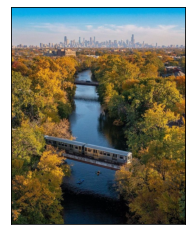

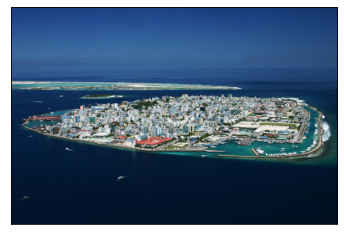

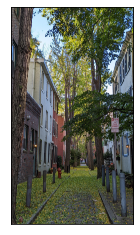

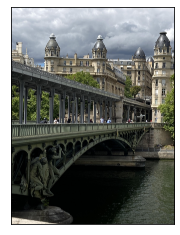

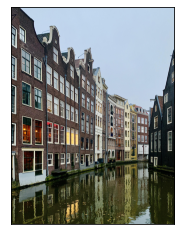

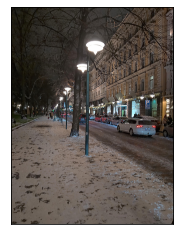

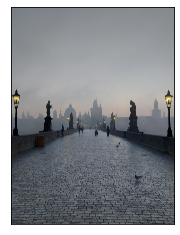

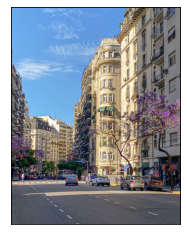

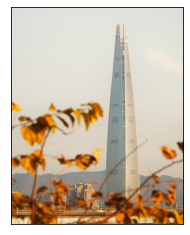

In [26]:
for file in os.scandir("downloadedImage"):
    if file.is_file():
        image = mpimg.imread(file.path)
        ax = plt.gca()
        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        plt.imshow(image)
        plt.show()



### Analisi delle città immortalate più volte
Facciamo adesso un'analisi dei post del Subreddit. In particolare, **vogliamo capire quali sono le città / stati che sono state immortalate più volte** (per semplicità, non facciamo distinzione tra singola città e intero stato).
Quello che facciamo è innazitutto **estrarre i titoli di un cospicuo numero di post tra i migliori del subreddit**:

In [27]:
titles=[]

print("Ottengo i titoli...")

for submission in reddit.subreddit("CityPorn").top(limit=500):
    if(not submission.stickied):
        titles.append(submission.title)
        
print(titles)

Ottengo i titoli...
['Not sure if this belongs in this sub, but i thought it was cool my First time flying into Chicago looked like I was flying into a computer! [2989x2989]', 'Kyiv, Ukraine, Europe', "The view from my desk in Chicago, IL, USA isn't one you see often and I'm really going to miss it [OC] [3024x4032]", 'Photo of the NYC blackout from my friend.', 'The beautiful architecture of Kyiv, Ukraine, Europe', 'Casablanca, Morocco [960x960]', 'Cloudy Day making Chicago look like an island.', 'Düsseldorf, Germany - before and after', 'Density of Tokyo', 'A literal urban jungle, Taipei, Taiwan [875×700]', 'Convenience store next to a lush street tree near downtown Seoul, South Korea.', 'Suspension Railway in Wuppertal, Germany', 'The Gateway Arch in St. Louis, Missouri during the recent snowstorm.', "The best photo I've taken in Chicago. From the roof of The Hard Rock Hotel [4016x4772]", 'Chicago, Illinois [1280x800]', 'Venice', 'Bern, Switzerland [OS] [3827x2505]', 'Ukraine, Kiev.'

A questo punto, dobbiamo **estrarre dai titoli i nomi delle città** immortalate nella foto. Useremo la libreria ***SpaCy***, la quale permette di **usare le più comuni tecniche di NLP** (qui la relativa [documentazione](https://spacy.io/api/doc)).

In questo caso useremo la tecnica "**Named Entity Recognition**", che ci permette di ***capire quando una certa parola indica una città, uno stato o in generale una località geografica***.


Innanzitutto, per installare SpaCy dobbiamo eseguire:
- **pip install spacy , per scaricare la libreria SpaCy**
- **python -m spacy download en_core_web_sm** , per scaricare un "English Corpus", cioè un dataset su cui SpaCy è stato allenato

A questo punto, **importiamo in Python la libreria SpaCy e carichiamo l'"English Corpus", che ci permette di analizzare testi in lingua inglese** :

In [28]:
import spacy
nlp = spacy.load("en_core_web_sm")

Possiamo adesso utilizzare le funzionalità di Named Entity Recognition offerte da SpaCy:<br>
Prima di tutto creiamo un nuovo ***documento*** attraverso la funzione "**nlp**", a cui passeremo come parametro il testo da analizzare. 

Facciamo prima un esempio con un testo "hard-coded":

In [29]:
doc = nlp("Beautiful photo in New York with my friend Donald Trump")
for e in doc.ents:
    print("{} - {} - {} - {}".format(e.text, e.label, e.label_, spacy.explain(e.label_)))

print ("\n------------------\n")

doc = nlp("This is my best photo from Rome, i was in front of the Parliament and i've seen Silvio Berlusconi!")
for e in doc.ents:
    print("{} - {} - {} - {}".format(e.text, e.label, e.label_, spacy.explain(e.label_)))

New York - 384 - GPE - Countries, cities, states
Donald Trump - 380 - PERSON - People, including fictional

------------------

Rome - 384 - GPE - Countries, cities, states
Parliament - 383 - ORG - Companies, agencies, institutions, etc.
Silvio Berlusconi - 380 - PERSON - People, including fictional


---

Facciamo quindi la stessa cosa con i titoli estratti dai post di Reddit per **identificare i nomi delle città presenti nei titoli**.

**N.B. Poichè ci sono diversi modi per scrivere le città di "New York" e "Los Angeles" (NY,N.Y.,LA,ecc...), useremo le seguenti espressioni regolari (grazie alla libreria "re") per ottenere tutti i match delle diverse scritture possibili**


<img src="Immagini/regexNY.png" alt="regex New York" width="50%" height="50%"/>

---

<img src="Immagini/regexLA.png" alt="regex Los Angeles" width="50%" height="50%"/>

<br>

In [30]:
import re

countries=[]
for text in titles:
    doc = nlp(text)
    for e in doc.ents:
        if e.label_=="GPE": #se la parola identificata è un'ORGANIZZAZIONE GEOPOLITICA (città,stato,regione)
            if re.search("^[Nn]\.?(ew)?\s?[Yy]\.?(ork)?[cC]?\.?$|NEW\s?YORK",e.text): # regex per "New York,NY,NYC,ecc..." 
                countries.append("New York City")
                break

            if re.search("^[Ll]\.?(os)?\s?[Aa]\.?(ngeles)?$|LOS\s?ANGELES",e.text): # regex per "Los Angeles,LA,ecc..."
                countries.append("Los Angeles")
                break
                
            countries.append(e.text)
            break    # potrebbero esserci titoli del tipo "London, England" in cui la città/stato sono ripetuti, 
                     # per cui se troviamo una prima occorenza di un nome di città/stato in un titolo, passiamo subito 
                     # al titolo successivo

print(countries)

['Chicago', 'Ukraine', 'Chicago', 'Kyiv', 'Casablanca', 'Chicago', 'Düsseldorf', 'Tokyo', 'Taipei', 'Seoul', 'Wuppertal', 'St. Louis', 'Chicago', 'Chicago', 'Venice', 'Switzerland', 'Ukraine', 'New York City', 'Brazil', 'Tokyo', 'Netherlands', 'Ukraine', 'Toronto', 'US', 'Toronto', 'Sicily', 'Scottsdale', 'San Francisco', 'Ukraïna', 'Flatiron', 'Dresden', 'Lhasa', 'Paris', 'New York City', 'Chicago', 'Utrecht', 'Montmartre', 'Ireland', 'Norway', 'San Francisco', 'Chicago', 'Toronto', 'Sicily', 'Lhasa', 'New Orleans', 'Vietnam', 'Tel Aviv', 'Sydney', 'Osaka', 'San Francisco', 'Vancouver', 'Vancouver', 'City(Kolkata', 'Dubai', 'London', 'Manhattan', 'Tokyo', 'Manhattan', 'Mumbai', 'Tokyo', 'Montmartre', 'Boston', 'New York City', 'New York City', 'New York City', 'Toronto', 'Los Angeles', 'Shenzhen', 'Italy', 'Malé', 'Kuala Lumpur', 'Boston', 'London', 'Greece', 'Tribeca', 'Detroit', 'Tokyo', 'Chongqing', 'Tirupati', 'Iceland', 'Tehran', 'Chicago', 'Manhattan', 'Seoul', 'Argentina', 'Hon

Vogliamo infine un grafico per vedere quali sono le città in cui sono state scattate più foto.
Impostiamo quindi i parametri del grafico prima di stamparlo.
<br>

1) **Usando due liste, impostiamo rispettivamente i valori presenti sui due assi cartesiani**: usiamo la libreria "collections" per vedere quali sono le città più comuni

In [31]:
import collections

xValues=[] #conterrà i 10 tag più comuni
yValues=[] #conterrà quante volte sono stati usati i 10 tag più comuni 

tagCount=collections.Counter(countries).most_common(10)  #restituisce una lista dei 10 elementi più comuni col relativo conteggio
for el in tagCount:
    xValues.append(el[0])  #el[0] contiene il tag
    yValues.append(el[1])  #el[1] contiene il conteggio di tale tag (cioè in quanti post è stato usato)
    
print(xValues)
print(yValues)

['Chicago', 'New York City', 'Tokyo', 'Manhattan', 'Vancouver', 'Boston', 'San Francisco', 'Paris', 'Toronto', 'London']
[23, 22, 15, 13, 11, 11, 10, 10, 9, 9]


2) **Impostiamo i parametri di visualizzazione del grafico** e **stampiamolo a schermo**

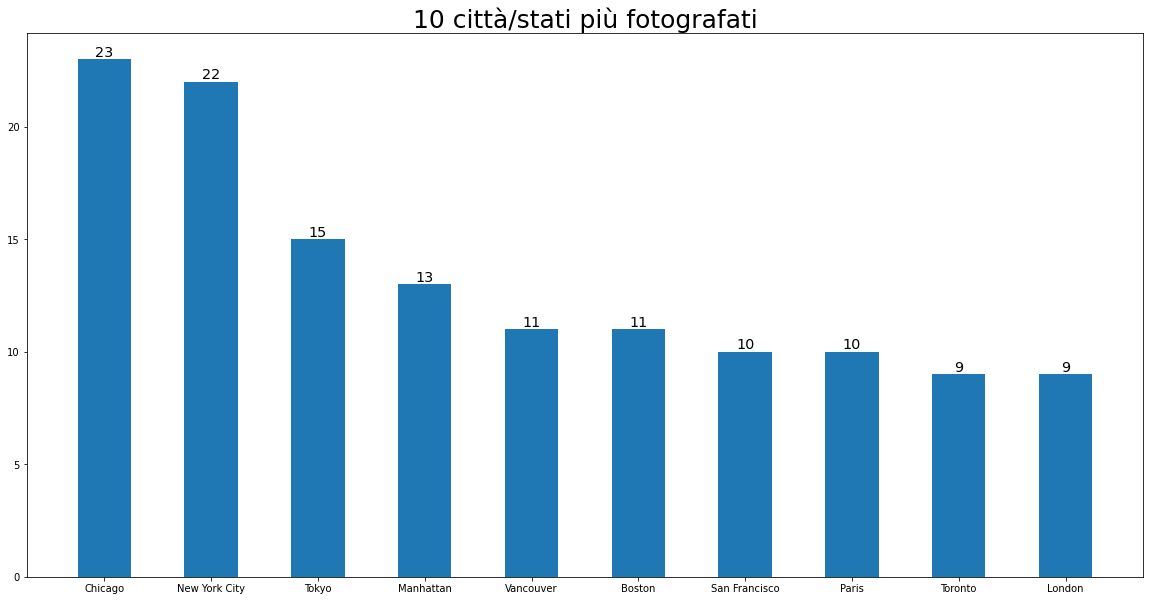

In [32]:
plt.rcParams["figure.figsize"] = (20,10)  #dimensioni del grafico

#titolo del grafico 

plt.title("10 città/stati più fotografati",{'fontsize': 25,
 'fontweight' :10,
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}
)

#inseriamo sulle barre del grafico i valori esatti per ogni tag (cosa che nel grafico di default non viene fatta)

for i in range(len(xValues)):   #aggiungere valori esatti alle singole barre
        plt.text(i, yValues[i], yValues[i], ha = 'center', va = 'bottom', fontsize='x-large')
        
_ = plt.bar(xValues, yValues,width=0.5) #il parametro "width" indica la larghezza delle singole barre

### Analisi delle città americane immortalate più volte
Come ultima analisi, potremmo essere interessati a capire quali sono le **città più immortalate esclusivamente americane tra i post più votati del SubReddit**.
Il procedimento è praticamente lo stesso del caso precedente:

In [33]:
titles=[]

print("Ottengo i titoli...")

for submission in reddit.subreddit("CityPorn").top(limit=150):  
    if(not submission.stickied):
        titles.append(submission.title)
        
countries=[]
for text in titles:
    doc = nlp(text)
    for e in doc.ents:
        if e.label_=="GPE": 
            countries.append(e.text)
            break
            
print("Dati ottenuti correttamente!")

Ottengo i titoli...
Dati ottenuti correttamente!


A questo punto, per capire se le città individuate sono americane o meno, faremo **web scraping della pagina di Wikipedia relativa alla città in questione**: sfrutteremo il fatto che ***tutte le pagine di Wikipedia seguono il formato "https://en.wikipedia.org/wiki/termine_ricercato"***.

Per effettuare Web Scraping utilizziamo la libreria **BeautifoulSoup**, che possiamo installare con il comando: <br>
***pip install bs4***

Importiamo quindi la libreria BeautifoulSoup4 su Python

In [34]:
from bs4 import BeautifulSoup

Quello che dobbiamo fare è **per ogni citta' aprire la relativa pagina di Wikipedia ed estrarre lo stato di appartenenza, e verificare che sia "United States"**.
<br>
<br>

Nella pagina Wikipedia di una qualunque città, possiamo notare la presenza di una tabella laterale contenente dati di vario genere sulla città in questione. A noi interessa esclusivamente la riga riguardante la **nazione di appartenenza**.

Facendo un'ispezione della pagina, notiamo che ognuna delle righe della tabella è composta da:
- un elemento **th** di classe **infobox-label** che indica quale informazione è contenuta in una determinata riga<br><br>
![th class](Immagini/thClass.png)<br><br>

- un elemento **td** di classe **infobox-data** che contiene l'effettivo dato relativo a tale riga<br><br>
![td class](Immagini/tdClass.png)<br><br>

Quello che facciamo è quindi:

1) **cercare nella pagina l'elemento "*th*" di classe "*infobox-label*"** che indica la nazione di appartenenza della città

2) **estrarre il contenuto del corrispondente elemento "*td*" di classe "*infobox-data*"**


**N.B. Anche in questo caso useremo le espressioni regolari viste in precedenza per ottenere tutti i match delle diverse scritture possibili delle città di New York e Los Angeles**

In [35]:
from urllib.request import urlopen
import re

USACities=[]
for city in countries:
    
    if re.search("^[Nn]\.?(ew)?\s?[Yy]\.?(ork)?[cC]?\.?$|NEW\s?YORK",city): # regex per "New York,NY,NYC,ecc..." 
        city="New York City"
        
    if re.search("^[Ll]\.?(os)?\s?[Aa]\.?(ngeles)?$|LOS\s?ANGELES",city): # regex per "Los Angeles,LA,ecc..."
        city="Los Angeles"

    try:
        #necessaria una codifica->decodifica in ASCII, unico formato di stringhe supportato da urllib
        page=urlopen("https://en.wikipedia.org/wiki/"+city.replace(' ', '_').encode('ascii', 'ignore').decode('ascii'))
        
    except urllib.error.HTTPError as e:   # try-catch di eventuali errori HTTP nell'apertura della pagina di Wikipedia
        continue
        
    page_html = page.read()
    page_soup = BeautifulSoup(page_html)
    item=page_soup.find("th", text="Country"); #questa operazione potrebbe impiegare un po' di tempo
    if item is not None:
        if re.search("[Uu]nited [Ss]tates",item.find_next_sibling("td").text):
            USACities.append(city)

print(USACities)

['Chicago', 'Chicago', 'Chicago', 'St. Louis', 'Chicago', 'Chicago', 'New York City', 'San Francisco', 'New York City', 'Chicago', 'San Francisco', 'Chicago', 'New Orleans', 'San Francisco', 'Manhattan', 'Manhattan', 'Boston', 'New York City', 'New York City', 'New York City', 'Los Angeles', 'Boston', 'Tribeca', 'Detroit', 'Chicago', 'Manhattan', 'Honolulu', 'Seattle', 'Chicago', 'Chicago', 'Queens', 'Chicago', 'Boston', 'Dumbo', 'Boston', 'Cleveland', 'New York City', 'Chicago', 'Chicago', 'Chicago']


<br>

Realizziamo adesso un grafico  a torta con le informazioni ottenute, mettendo in risalto le **5 città americane più fotografate**:

<br>

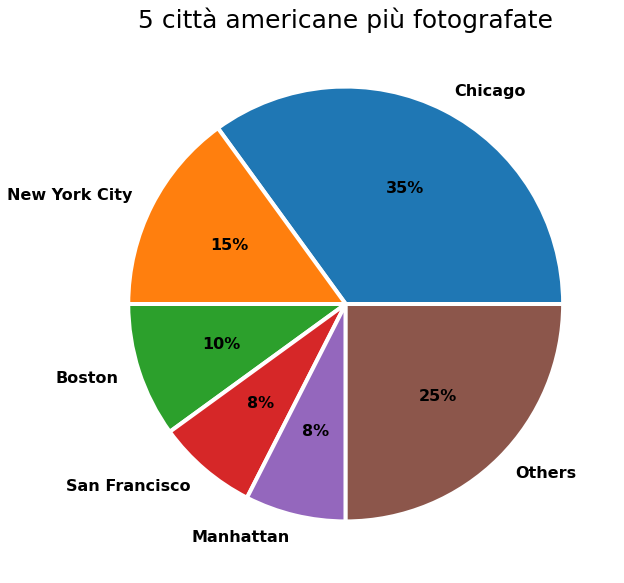

In [36]:
labels=[]
values=[]

lista=collections.Counter(USACities).items()
lista = sorted(lista, key=lambda t: t[1], reverse=True)

printNum = i = 5 #cambiando questo valore modifichiamo il numero di città "in risalto" da stampare nel grafico
others = 0

for el in lista:
    labels.append(el[0])
    values.append(el[1])
    i=i-1
    if i==0:
        labels.append("Others")
        for el2 in lista[printNum:]:
            others=others+1
        values.append(others)
        break
        

plt.title(str(printNum) + " città americane più fotografate",{'fontsize': 25,
 'fontweight' :10,
 'verticalalignment': 'top',
 'horizontalalignment': 'center'}
)

_ = plt.pie(values, labels=labels, radius=1.0, autopct='%1.0f%%',
            textprops={'fontsize': 16,'fontweight': "bold"},
            wedgeprops = {"edgecolor" : "white",
                      'linewidth': 4,
                      'antialiased': True})

---

# Conclusione
Come abbiamo visto, Reddit è un'enorme fonte di dati che possiamo estrarre e analizzare.

Il vantaggio di Reddit rispetto ad altri social, dal punto di vista dell'analisi dei dati, è quello di **poter restringere il campo di ricerca soltanto ai subreddit che ci interessano**, oltre al fatto di **vantare un numero di utenti elevatissimo**.

L'estrazione dei dati, se effettuata con le API ufficiali, può risultare abbastanza complessa, soprattutto per quanto riguarda l'ottenimento dei token necessari per effettuare le richieste, e anche a causa della complessità delle risposte JSON restituite.

Possiamo semplificare molto il processo di estrazione dei dati da Reddit utilizzando il wrapper PRAW per Python, il quale permette di ottenere i token necessari e i dati che ci servono in maniera molto più semplice rispetto alle API ufficiali.